<a href="https://colab.research.google.com/github/konkolyseismolab/autoeap/blob/master/examples/apply_k2sc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### If you are in Google Colab, first install the package and K2SC too

In [ ]:
!pip install autoeap
!pip install george k2sc

## Example: apply K2 Systematic Correction to raw light curve

K2SC is intended to remove instrumental signals caused by the two-wheel pointing of the telescope.

__To run this notebook, first you have to install K2SC from its repository:__ https://github.com/OxES/k2sc

You can download a TPF from MAST.

In [1]:
import autoeap

targetID = 'EPIC 248783511'
campaign = 14

And enable K2SC, then additional spline correction to K2SC corrected light curve to get rid of trends (if any).

To compare the raw and the corrected light curves, you can save the results to a file.

In [2]:
time,flux,flux_err = autoeap.createlightcurve(
        targetID,              # Path to TPF or EPIC ID
        apply_K2SC=True,       # Apply K2 systematic correction
        detrend=True,         # Fit and remove low-order spline
        save_lc=True,          # Save final light curve to file
        campaign=campaign,     # K2 campaign number if TPF should be downladed
        show_plots=False,      # Vizualize steps inside notebook
        save_plots=False,      # Save plot files in a folder
        save_aperture=False,   # Save the final aperture to a FITS file
        polyorder='auto',      # The order of the detrending polynomial
        sigma_detrend=10       # The number of standard deviations to use for sigma clipping limit before spline correction.
        )

/Users/batty/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/batty/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/batty/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/batty/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Local TPF not found, trying to download TPF instead


/Users/batty/opt/miniconda3/lib/python3.7/site-packages/keyring/backend.py:199: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  entry_points = metadata.entry_points().get('keyring.backends', [])


TPF found on MAST: K2 Campaign 14
Finding PSF centroids and removing outliers


  1%|          | 31/3772 [00:00<00:12, 309.22it/s]

Optimizing apertures for each cadence


100%|██████████| 3772/3772 [00:09<00:00, 388.86it/s]


Starting iteration
Using Gaia to separate sources
Iteration: 1
Using Gaia to separate sources
Iteration: 2
Using Gaia to separate sources
Iteration: 3
Iteration finished
Optimizing final aperture
Initial PDM theta = 0.1883
Keeping aperture with initial PDM
Applying K2SC
Proposed period for periodic kernel is 0.64
Using default splits [3085, 3123.75] for campaign 14
Starting initial outlier detection
  Flagged 151 ( 4.0%) outliers.
Starting Lomb-Scargle period search
Found period at: 0.64
Overriding automatic kernel selection, using quasiperiodic kernel as given in the command line
Starting global hyperparameter optimisation using DE
  DE iteration   0 -ln(L) -850.9
  DE iteration   1 -ln(L) -850.9
  DE iteration   2 -ln(L) -1369.0
  DE iteration   3 -ln(L) -1457.2
  DE iteration   4 -ln(L) -1490.2
  DE iteration   5 -ln(L) -1551.4
  DE iteration   6 -ln(L) -1551.4
  DE iteration   7 -ln(L) -1588.3
  DE iteration   8 -ln(L) -1588.3
  DE iteration   9 -ln(L) -1588.3
  DE iteration  10 -l

#### Visualize the corrected result

In [3]:
%matplotlib inline

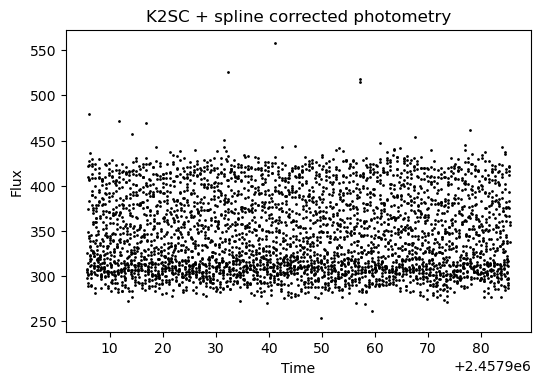

In [4]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.title('K2SC + spline corrected photometry')
plt.scatter(time, flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

#### Compare the raw and corrected results

Load saved data.

In [7]:
import pandas as pd

lc = pd.read_csv('EPIC_248783511_c14_autoEAP_k2sc_spline.lc', delim_whitespace=True)
lc

,time,flux,flux_err,corr_flux,splined_flux
0,2.457906e+06,310.93167,4.542228,299.200885,303.938535
1,2.457906e+06,329.25284,4.542962,320.625916,325.339840
2,2.457906e+06,307.36470,4.541578,301.510631,306.200921
3,2.457906e+06,305.96710,4.541167,302.708397,307.375146
4,2.457906e+06,295.44528,4.539751,293.632750,298.276051
...,...,...,...,...,...
3752,2.457985e+06,387.61490,4.872160,394.961035,375.131855
3753,2.457985e+06,386.00497,4.872903,385.797347,365.910381
3754,2.457985e+06,379.87296,4.873064,379.600723,359.655834
3755,2.457985e+06,376.19772,4.873232,376.348871,356.345919


As you can see, there are five columns. Let's compare the results.

The spline can be reproduced by dividing the K2SC corrected and spline corrected light curves.

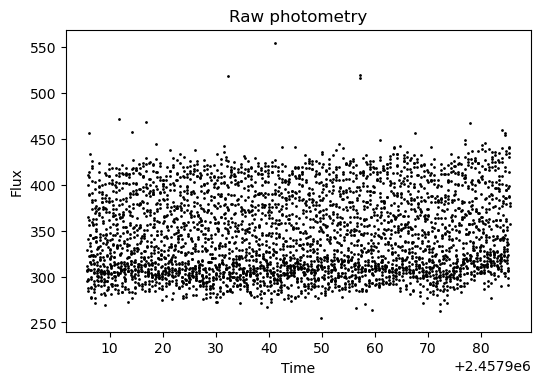

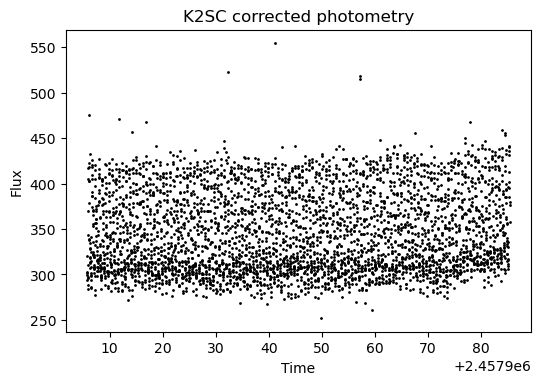

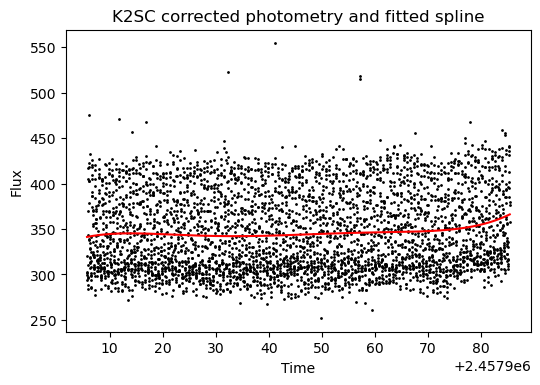

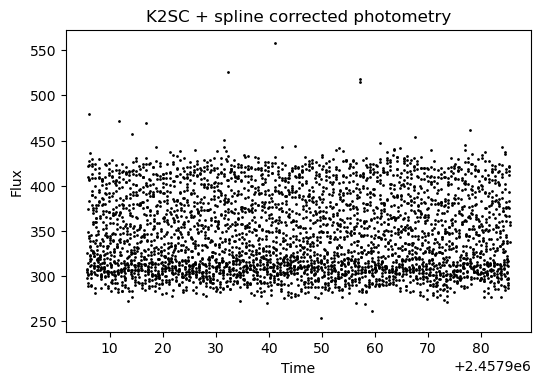

In [8]:
plt.figure(dpi=100)
plt.title('Raw photometry')
plt.scatter(lc.time, lc.flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

plt.figure(dpi=100)
plt.title('K2SC corrected photometry')
plt.scatter(lc.time, lc.corr_flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()


spline = ( lc.corr_flux-lc.splined_flux ) + lc.corr_flux.mean()

plt.figure(dpi=100)
plt.title('K2SC corrected photometry and fitted spline')
plt.scatter(lc.time, lc.corr_flux, s=1, color='black')
plt.plot(lc.time, spline, c='r')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

plt.figure(dpi=100)
plt.title('K2SC + spline corrected photometry')
plt.scatter(lc.time, lc.splined_flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()